In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(256,)


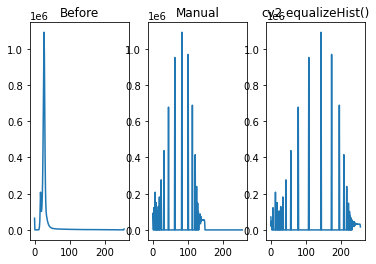

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('/content/drive/MyDrive/RGB Brightness/CLD00001_RGB_K3A_NIA0001.png', cv2.COLOR_BGR2YUV)
rows, cols = img.shape[:2]

#--② 이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) #히스토그램 계산
cdf = hist.cumsum()                                     # 누적 히스토그램 
cdf_m = np.ma.masked_equal(cdf, 0)                      # 0(zero)인 값을 NaN으로 제거
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 150      # 이퀄라이즈 히스토그램 계산
cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN을 다시 0으로 환원
print(cdf.shape)
img2 = cdf[img]                                         # 히스토그램을 픽셀로 맵핑

#--③ OpenCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)

#--④ 이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

#--⑤ 결과 출력
plt.show('Before', img)
plt.show('Manual', img2)
plt.show('cv2.equalizeHist()', img3)
hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()


In [ ]:
# METHOD 2: HSV (or other color spaces)
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
import math

def convert_gamma_HSV(img_path):
  
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)
    # convert img to HSV
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    hue, sat, val = cv2.split(hsv)
    
    #compute gamma = log(mid*255)/log(mean)
    #gamma = float(input("감마값 : "))
    #gamma1 = gamma.astype(np.float)
    #mean = np.gamma1(val)
    #gamma2 = ((gamma1 / 255) ** (1 / gamma)) * 255
    def gammaCorrection(src, gamma):
      invGamma = 1 / gamma
    
      table = [((i / 255) ** invGamma) * 255 for i in range(256)]
      table = np.array(table, np.uint8)
    
      return cv2.LUT(src, table)

    gammaImg = gammaCorrection(val, 0.5)

        #do gamma correction on value channel
    #val_gamma = np.power(val, gammaImg).clip(0,255).astype(np.uint8)
        # combine new value channel with original hue and sat channels
    hsv_gamma = cv2.merge([hue, sat, gammaImg])
    img_gamma2 = cv2.cvtColor(hsv_gamma, cv2.COLOR_HSV2RGB)

    save_img = Image.fromarray(img_gamma2)
    save_img.save(f'/content/drive/MyDrive/밝기_전처리/GAMMA_0.5_rgb/'+ f'{img_name}')

convert_gamma_HSV('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.png', 'CLD00053_RGB_K3_NIA0053.png', 'CLD00059_RGB_K3_NIA0059.pn

In [ ]:
# METHOD 2: HSV (or other color spaces)
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
import math
    
    #compute gamma = log(mid*255)/log(mean)
    #gamma = float(input("감마값 : "))
    #gamma1 = gamma.astype(np.float)
    #mean = np.gamma1(val)
    #gamma2 = ((gamma1 / 255) ** (1 / gamma)) * 255
    
def gammaCorrection(src, gamma):
  invGamma = 1 / gamma
    
  table = [((i / 255) ** invGamma) * 255 for i in range(256)]
  table = np.array(table, np.uint8)
      
  return cv2.LUT(src, table)

        #do gamma correction on value channel
    #val_gamma = np.power(val, gammaImg).clip(0,255).astype(np.uint8)
 
      # combine new value channel with original hue and sat channels
def convert_gamma_HSV(img_path):
  
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)
    # convert img to HSV
    gammaImg = gammaCorrection(src, 1.5)

    save_img = Image.fromarray(gammaImg)
    save_img.save(f'/content/drive/MyDrive/밝기_전처리/GAMMA_1.5_rgb/'+ f'{img_name}')

convert_gamma_HSV('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.png', 'CLD00053_RGB_K3_NIA0053.png', 'CLD00059_RGB_K3_NIA0059.pn

In [ ]:
# METHOD 2: HSV (or other color spaces)
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
import math

def convert_gamma_HSV(img_path):
  
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)
    # convert img to HSV
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    hue, sat, val = cv2.split(hsv)
    
    #compute gamma = log(mid*255)/log(mean)
    #gamma = float(input("감마값 : "))
    #gamma1 = gamma.astype(np.float)
    #mean = np.gamma1(val)
    #gamma2 = ((gamma1 / 255) ** (1 / gamma)) * 255
    def gammaCorrection(src, gamma):
      invGamma = 1 / gamma
    
      table = [((i / 255) ** invGamma) * 255 for i in range(256)]
      table = np.array(table, np.uint8)
    
      return cv2.LUT(src, table)

    gammaImg = gammaCorrection(val, 0.25)

        #do gamma correction on value channel
    #val_gamma = np.power(val, gammaImg).clip(0,255).astype(np.uint8)
        # combine new value channel with original hue and sat channels
    hsv_gamma = cv2.merge([hue, sat, gammaImg])
    img_gamma2 = cv2.cvtColor(hsv_gamma, cv2.COLOR_HSV2RGB)

    save_img = Image.fromarray(img_gamma2)
    save_img.save(f'/content/drive/MyDrive/밝기_전처리/GAMMA HSV_0.25 (BRIGHT)/'+ f'{img_name}')

convert_gamma_HSV('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

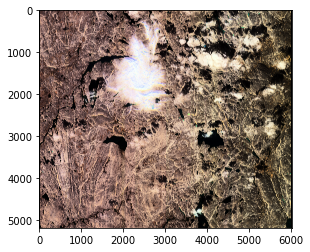

In [ ]:
#RGB equalization
import cv2
import numpy as np
import argparse
import os
import matplotlib.pyplot as plt

# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Image path to the directory")
# args = vars(ap.parse_args())
# path = args['image']

path = "/content/drive/MyDrive/CLD01.png"

# 입력 받은 이미지를 불러옵니다.
src = cv2.imread(path)

# YCrCb 컬러 형태로 변환합니다.
yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
# y, Cr, Cb로 컬러 영상을 분리 합니다.
y, Cr, Cb = cv2.split(yCrCb)
# y값을 히스토그램 평활화를 합니다.
equalizedY = cv2.equalizeHist(y)
# equalizedY, Cr, Cb를 합쳐서 새로운 yCrCb 이미지를 만듭니다.
yCrCb2 = cv2.merge([equalizedY, Cr, Cb])
#  yCrCb2를 다시 BGR 형태로 변경합니다.
yCrCbDst = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2BGR)
#마지막으로 hsvDst을 다시 RGB 형태로 변경합니다.
yCrCbDst_final = cv2.cvtColor(yCrCbDst, cv2.COLOR_BGR2RGB)

plt.imshow(hsvDst)

In [ ]:
#Grayscale to Equalization 
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
import math

def convert_gamma(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)

    # METHOD 1: RGB

    # convert img to gray
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    # compute gamma = log(mid*255)/log(mean)
    mid = 0.25
    mean = np.mean(gray)
    gamma = math.log(mid*255)/math.log(mean)
    print(gamma)

    # do gamma correction
    img_gamma1 = np.power(gray, gamma).clip(0,255).astype(np.uint8)

    save_img = Image.fromarray(img_gamma1)
    save_img.save(f'/content/drive/MyDrive/GAMMA RGB (DARK)/'+ f'{img_name}')

convert_gamma('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
    # METHOD 2: HSV (or other color spaces)

    # convert img to HSV
    #hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #hue, sat, val = cv2.split(hsv)

    # compute gamma = log(mid*255)/log(mean)
    #mid = 0.5
    #mean = np.mean(val)
    #gamma = math.log(mid*255)/math.log(mean)
    #print(gamma)

    # do gamma correction on value channel
    #val_gamma = np.power(val, gamma).clip(0,255).astype(np.uint8)

    # combine new value channel with original hue and sat channels
    #hsv_gamma = cv2.merge([hue, sat, val_gamma])
    #img_gamma2 = cv2.cvtColor(hsv_gamma, cv2.COLOR_HSV2BGR)


/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00167_RGB_K3A_NIA0481.png', 'CLD00177_RGB_K3A_NIA0491.png', 'CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.

In [ ]:
# METHOD 2: HSV (or other color spaces)
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
import math

def convert_gamma_HSV(img_path):
  
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)
    # convert img to HSV
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    hue, sat, val = cv2.split(hsv)
    
    compute gamma = log(mid*255)/log(mean)
    mid = 1.25
    mean = np.mean(val)
    gamma = math.log(mid*255)/math.log(mean)

    #do gamma correction on value channel
    val_gamma = np.power(val, gamma).clip(0,255).astype(np.uint8)

    # combine new value channel with original hue and sat channels
    hsv_gamma = cv2.merge([hue, sat, val_gamma])
    img_gamma2 = cv2.cvtColor(hsv_gamma, cv2.COLOR_HSV2RGB)

    save_img = Image.fromarray(img_gamma2)
    save_img.save(f'/content/drive/MyDrive/밝기_전처리/GAMMA HSV_1.25 (DARK)/'+ f'{img_name}')

convert_gamma_HSV('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00050_RGB_K3_NIA0050.png', 'CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00052_RGB_K3_NIA0052.png', 'CLD00053_RGB_K3_NIA0053.png', 'CLD00059_RGB_K3_NIA0059.pn

In [ ]:
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
import math

def convert_gamma_HSV(img_path):
  
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)
    # convert img to HSV
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    hue, sat, val = cv2.split(hsv)

    # compute gamma = log(mid*255)/log(mean)
   # mid = 1.25
   # mean = np.mean(val)
    #gamma = math.log(mid*255)/math.log(mean)

    #do gamma correction on value channel
    val_gamma = np.power(val, gamma).clip(0,255).astype(np.uint8)

    # combine new value channel with original hue and sat channels
    hsv_gamma = cv2.merge([hue, sat, val_gamma])
    img_gamma2 = cv2.cvtColor(hsv_gamma, cv2.COLOR_HSV2RGB)

    save_img = Image.fromarray(img_gamma2)
    save_img.save(f'/content/drive/MyDrive/밝기_전처리/GAMMA HSV_1.25 (DARK)/'+ f'{img_name}')

convert_gamma_HSV('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

In [ ]:
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt

def convert_equalization(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)

      # YCrCb 컬러 형태로 변환합니다.
    yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
    # y, Cr, Cb로 컬러 영상을 분리 합니다.
    y, Cr, Cb = cv2.split(yCrCb)
    # y값을 히스토그램 평활화를 합니다.
    equalizedY = cv2.equalizeHist(y)
    # equalizedY, Cr, Cb를 합쳐서 새로운 yCrCb 이미지를 만듭니다.
    yCrCb2 = cv2.merge([equalizedY, Cr, Cb])
    #  yCrCb2를 다시 BGR 형태로 변경합니다.
    yCrCbDst = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2BGR)
    #마지막으로 hsvDst을 다시 RGB 형태로 변경합니다.
    yCrCbDst_final = cv2.cvtColor(yCrCbDst, cv2.COLOR_BGR2RGB)
    save_img = Image.fromarray(yCrCbDst_final)
    save_img.save(f'/content/drive/MyDrive/RGB EQUALIZATION (BLACK WHITE)/'+ f'{img_name}')

convert_equalization('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00167_RGB_K3A_NIA0481.png', 'CLD00177_RGB_K3A_NIA0491.png', 'CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.

In [ ]:
#hsv, v(0)
def convert_equalization(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)

     # hsv 컬러 형태로 변형합니다.
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    # h, s, v로 컬러 영상을 분리 합니다. 
    h, s, v = cv2.split(hsv)
    # v값을 히스토그램 평활화를 합니다.
    equalizedV = cv2.equalizeHist(v)
    # h,s,equalizedV를 합쳐서 새로운 hsv 이미지를 만듭니다.
    hsv2 = cv2.merge([h,s,equalizedV])
    # hsv2를 다시 BGR 형태로 변경합니다.
    hsvDst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
    #마지막으로 hsvDst을 다시 RGB 형태로 변경합니다.
    hsvDst_final = cv2.cvtColor(hsvDst, cv2.COLOR_BGR2RGB)
    save_img = Image.fromarray(hsvDst_final)
    save_img.save(f'/content/drive/MyDrive/RGB EQUALIZATION (HSV)/'+ f'{img_name}')

convert_equalization('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00167_RGB_K3A_NIA0481.png', 'CLD00177_RGB_K3A_NIA0491.png', 'CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.

In [ ]:
#LAB, L(0)
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
def convert_equalization(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)

     # lab 컬러 형태로 변형합니다.
    lab = cv2.cvtColor(src, cv2.COLOR_BGR2LAB)
    # h, s, v로 컬러 영상을 분리 합니다. 
    l, a, b = cv2.split(lab)
    # l값을 히스토그램 평활화를 합니다.
    equalizedl = cv2.equalizeHist(l)
    # equalizedl,a,b를 합쳐서 새로운 lab 이미지를 만듭니다.
    lab2 = cv2.merge([equalizedl,a,b])
    # hsv2를 다시 BGR 형태로 변경합니다.
    labDst = cv2.cvtColor(lab2, cv2.COLOR_LAB2BGR)
    #마지막으로 labDst을 다시 RGB 형태로 변경합니다.
    labDst_final = cv2.cvtColor(labDst, cv2.COLOR_BGR2RGB)
    save_img = Image.fromarray( labDst_final)
    save_img.save(f'/content/drive/MyDrive/LAB EQUALIZATION /'+ f'{img_name}')

convert_equalization('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.png', 'CLD00053_RGB_K3_NIA0053.png', 'CLD00059_RGB_K3_NIA0059.pn

In [ ]:
#RGB to HLS, s(0)
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
def convert_equalization(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)

     # hls 컬러 형태로 변형합니다.
    hls = cv2.cvtColor(src, cv2.COLOR_BGR2HLS)
    # h, s, v로 컬러 영상을 분리 합니다. 
    h, l, s = cv2.split(hls)
    # l값을 히스토그램 평활화를 합니다.
    equalizedl = cv2.equalizeHist(l)
    # equalizedl,a,b를 합쳐서 새로운 lab 이미지를 만듭니다.
    hls2 = cv2.merge([h,equalizedl,s])
    # hsv2를 다시 BGR 형태로 변경합니다.
    hlsDst = cv2.cvtColor(hls2, cv2.COLOR_HLS2BGR)
    #마지막으로 labDst을 다시 RGB 형태로 변경합니다.
    hlsDst_final = cv2.cvtColor(hlsDst, cv2.COLOR_BGR2RGB)
    save_img = Image.fromarray(hlsDst_final)
    save_img.save(f'/content/drive/MyDrive/밝기_전처리/HLS_RGB EQUALIZATION /'+ f'{img_name}')

convert_equalization('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00050_RGB_K3_NIA0050.png', 'CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00052_RGB_K3_NIA0052.png', 'CLD00053_RGB_K3_NIA0053.png', 'CLD00059_RGB_K3_NIA0059.pn

In [ ]:
#XYZ_RGB
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
def convert_equalization(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)

     # lab 컬러 형태로 변형합니다.
    xyz = cv2.cvtColor(src, cv2.COLOR_BGR2XYZ)
    # x, y, z로 컬러 영상을 분리 합니다. 
    x, y, z = cv2.split(xyz)
    # l값을 히스토그램 평활화를 합니다.
    equalizedz = cv2.equalizeHist(z)
    # equalizedl,a,b를 합쳐서 새로운 lab 이미지를 만듭니다.
    xyz2 = cv2.merge([x,y,equalizedz])
    # hsv1를 다시 BGR 형태로 변경합니다.
    xyzDst = cv2.cvtColor(xyz2, cv2.COLOR_XYZ2BGR)
    #마지막으로 labDst을 다시 RGB 형태로 변경합니다.
    xyzDst_final = cv2.cvtColor(xyzDst, cv2.COLOR_XYZ2RGB)
    save_img = Image.fromarray( xyzDst_final)
    save_img.save(f'/content/drive/MyDrive/XYZ_RGB/'+ f'{img_name}')

convert_equalization('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.png', 'CLD00053_RGB_K3_NIA0053.png', 'CLD00059_RGB_K3_NIA0059.pn

In [ ]:
#XYZ FILE
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
def convert_equalization(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)

     # lab 컬러 형태로 변형합니다.
    xyz = cv2.cvtColor(src, cv2.COLOR_BGR2XYZ)
    save_img = Image.fromarray(xyz)
    save_img.save(f'/content/drive/MyDrive/밝기_전처리/XYZ/'+ f'{img_name}')

convert_equalization('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.png', 'CLD00053_RGB_K3_NIA0053.png', 'CLD00059_RGB_K3_NIA0059.pn

In [ ]:
#XYZ->LUV
#밝기값(lightness)인 L*와 Green-Red축을 가 진 U*값 과 Blue-Yellow축 을 가 진 V*값
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
def convert_equalization(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/밝기_전처리/XYZ/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)

     # lab 컬러 형태로 변형합니다.
    luv = cv2.cvtColor(src, cv2.COLOR_RGB2Luv)
    # l, u, v로 컬러 영상을 분리 합니다. 
    l, u, v = cv2.split(luv)
    # l값을 히스토그램 평활화를 합니다.
    equalizedl = cv2.equalizeHist(l)
    # equalizedl,a,b를 합쳐서 새로운 lab 이미지를 만듭니다.
    luv2 = cv2.merge([equalizedl, u, v])
    # hsv1를 다시 BGR 형태로 변경합니다.
    luvDst = cv2.cvtColor(luv2, cv2.COLOR_Luv2RGB)
    #마지막으로 labDst을 다시 RGB 형태로 변경합니다.
    luvDst_final = cv2.cvtColor(luvDst, cv2.COLOR_Luv2RGB)
    save_img = Image.fromarray(luvDst_final)
    save_img.save(f'/content/drive/MyDrive/밝기_전처리/XYZ_LUV EQUALIZATION/'+ f'{img_name}')

convert_equalization('/content/drive/MyDrive/밝기_전처리/XYZ/')

/content/drive/MyDrive/밝기_전처리/XYZ/
['CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.png', 'CLD00053_RGB_K3_NIA0053.png', 'CLD00059_RGB_K3_NIA0059.png', 'CLD00061_RGB_K3_NIA0061.png', 'CLD00065_RGB

In [ ]:
#Luv_RGB. L(0)
#밝기값(lightness)인 L*와 Green-Red축을 가 진 U*값 과 Blue-Yellow축 을 가 진 V*값
from skimage.transform import resize
from skimage.io import imread_collection
import cv2 
import numpy as np
from PIL import Image
import os
import glob
import argparse
import matplotlib.pyplot as plt
def convert_equalization(img_path):
  # 이미지 경로 가져오기
  print(img_path)
  file_list = os.listdir('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')
  print(file_list)
  print(len(file_list))

  for i, img_name in enumerate(file_list):
    print(i)
    # 입력 받은 이미지를 불러옵니다.
    src = cv2.imread(img_path+img_name)

     # lab 컬러 형태로 변형합니다.
    luv = cv2.cvtColor(src, cv2.COLOR_BGR2Luv)
    # l, u, v로 컬러 영상을 분리 합니다. 
    l, u, v = cv2.split(luv)
    # l값을 히스토그램 평활화를 합니다.
    equalizedl = cv2.equalizeHist(l)
    # equalizedl,a,b를 합쳐서 새로운 lab 이미지를 만듭니다.
    luv2 = cv2.merge([equalizedl, u, v])
    # hsv1를 다시 BGR 형태로 변경합니다.
    luvDst = cv2.cvtColor(luv2, cv2.COLOR_Luv2BGR)
    #마지막으로 labDst을 다시 RGB 형태로 변경합니다.
    luvDst_final = cv2.cvtColor(luvDst, cv2.COLOR_Luv2RGB)
    save_img = Image.fromarray(luvDst_final)
    save_img.save(f'/content/drive/MyDrive/LUV_RGB/'+ f'{img_name}')

convert_equalization('/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/')

/content/drive/MyDrive/deeplabv3plus/Deeplabv3plus1/datasets/data/cloud/data/train/train/
['CLD00001_RGB_K3A_NIA0001.png', 'CLD00003_RGB_K3A_NIA0003.png', 'CLD00004_RGB_K3A_NIA0004.png', 'CLD00008_RGB_K3A_NIA0008.png', 'CLD00011_RGB_K3A_NIA0011.png', 'CLD00012_RGB_K3A_NIA0012.png', 'CLD00016_RGB_K3A_NIA0016.png', 'CLD00017_RGB_K3A_NIA0017.png', 'CLD00018_RGB_K3A_NIA0018.png', 'CLD00021_RGB_K3A_NIA0021.png', 'CLD00022_RGB_K3A_NIA0022.png', 'CLD00023_RGB_K3A_NIA0023.png', 'CLD00028_RGB_K3A_NIA0028.png', 'CLD00029_RGB_K3A_NIA0029.png', 'CLD00033_RGB_K3_NIA0033.png', 'CLD00035_RGB_K3_NIA0035.png', 'CLD00036_RGB_K3_NIA0036.png', 'CLD00038_RGB_K3_NIA0038.png', 'CLD00039_RGB_K3_NIA0039.png', 'CLD00040_RGB_K3_NIA0040.png', 'CLD00042_RGB_K3_NIA0042.png', 'CLD00044_RGB_K3_NIA0044.png', 'CLD00045_RGB_K3_NIA0045.png', 'CLD00047_RGB_K3_NIA0047.png', 'CLD00048_RGB_K3_NIA0048.png', 'CLD00050_RGB_K3_NIA0050.png', 'CLD00052_RGB_K3_NIA0052.png', 'CLD00053_RGB_K3_NIA0053.png', 'CLD00059_RGB_K3_NIA0059.pn

FileNotFoundError: ignored

(256,)


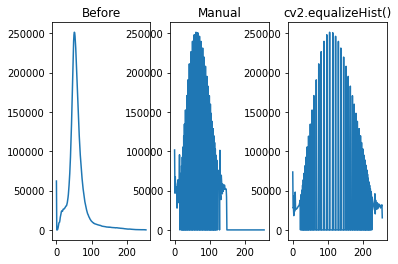

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('/content/drive/MyDrive/RGB Brightness/CLD00079_RGB_K3_NIA0393.png', cv2.COLOR_BGR2YUV)
rows, cols = img.shape[:2]

#--② 이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256]) #히스토그램 계산
cdf = hist.cumsum()                                     # 누적 히스토그램 
cdf_m = np.ma.masked_equal(cdf, 0)                      # 0(zero)인 값을 NaN으로 제거
cdf_m = (cdf_m - cdf_m.min()) /(rows * cols) * 150      # 이퀄라이즈 히스토그램 계산
cdf = np.ma.filled(cdf_m,0).astype('uint8')             # NaN을 다시 0으로 환원
print(cdf.shape)
img2 = cdf[img]                                         # 히스토그램을 픽셀로 맵핑

#--③ OpenCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)

#--④ 이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

#--⑤ 결과 출력
plt.show('Before', img)
plt.show('Manual', img2)
plt.show('cv2.equalizeHist()', img3)
hists = {'Before':hist, 'Manual':hist2, 'cv2.equalizeHist()':hist3}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#read image
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread('/content/drive/MyDrive/RGB Brightness/')
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

def equalize_this(image_file, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    if not gray_scale:
        r_image, g_image, b_image = cv2.split(image_src)

        r_image_eq = cv2.equalizeHist(r_image)
        g_image_eq = cv2.equalizeHist(g_image)
        b_image_eq = cv2.equalizeHist(b_image)

        image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
        cmap_val = None
    else:
        image_eq = cv2.equalizeHist(image_src)
        cmap_val = 'gray'

    if with_plot:
        fig = plt.figure(figsize=(10, 20))

        ax1 = fig.add_subplot(2, 2, 1)
        ax1.axis("off")
        ax1.title.set_text('Original')
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.axis("off")
        ax2.title.set_text("Equalized")

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_eq, cmap=cmap_val)
        return True
    return image_eq
